In [1]:
import pandas as pd

# Load the dataset
investments = pd.read_csv("startup_investments.csv")

# Display first 5 rows
print(investments.head())


   Startup    Industry Funding_Round  Amount_USD        Date       City
0    Alpha     Fintech          Seed      500000  2026-01-01  Bangalore
1     Beta      Health      Series A     2000000  2026-01-03     Mumbai
2    Gamma          AI          Seed      750000  2026-01-05      Delhi
3    Delta  E-Commerce      Series B     5000000  2026-01-06  Bangalore
4  Epsilon      Health          Seed      300000  2026-01-07     Mumbai


In [3]:
#Check column info: names, types, non-null counts
print(investments.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Startup        8 non-null      object
 1   Industry       8 non-null      object
 2   Funding_Round  8 non-null      object
 3   Amount_USD     8 non-null      int64 
 4   Date           8 non-null      object
 5   City           8 non-null      object
dtypes: int64(1), object(5)
memory usage: 516.0+ bytes
None


In [4]:
#Summary statistics for numeric columns (Amount_USD)
print(investments.describe())  


         Amount_USD
count  8.000000e+00
mean   1.406250e+06
std    1.575354e+06
min    2.000000e+05
25%    4.500000e+05
50%    8.750000e+05
75%    1.625000e+06
max    5.000000e+06


In [5]:
#Check for missing values in each column
print(investments.isnull().sum())  


Startup          0
Industry         0
Funding_Round    0
Amount_USD       0
Date             0
City             0
dtype: int64


In [6]:
#Convert 'Date' column to datetime type for easier analysis
investments['Date'] = pd.to_datetime(investments['Date'])


In [7]:

# Clean text columns (remove extra spaces)
investments['Industry'] = investments['Industry'].str.strip()
investments['Funding_Round'] = investments['Funding_Round'].str.strip()
investments['City'] = investments['City'].str.strip()

In [8]:
#Create new column: Amount in Millions USD for easier visualization
investments['Amount_Million'] = investments['Amount_USD'] / 1_000_000


In [9]:
#Create a flag for big investments (>1 million USD)
investments['Big_Investment'] = investments['Amount_USD'] > 1_000_000


In [10]:

#  Check the first few rows to confirm changes
print(investments.head())


   Startup    Industry Funding_Round  Amount_USD       Date       City  \
0    Alpha     Fintech          Seed      500000 2026-01-01  Bangalore   
1     Beta      Health      Series A     2000000 2026-01-03     Mumbai   
2    Gamma          AI          Seed      750000 2026-01-05      Delhi   
3    Delta  E-Commerce      Series B     5000000 2026-01-06  Bangalore   
4  Epsilon      Health          Seed      300000 2026-01-07     Mumbai   

   Amount_Million  Big_Investment  
0            0.50           False  
1            2.00            True  
2            0.75           False  
3            5.00            True  
4            0.30           False  


In [12]:
import matplotlib.pyplot as plt   # For basic plotting
import seaborn as sns             # For advanced, nicer plots

#  Total funding by Industry
industry_totals = investments.groupby('Industry')['Amount_USD'].sum()
print(industry_totals)  # Shows total funding per industry

# Count of startups per City
city_counts = investments['City'].value_counts()
print(city_counts)  # Shows number of startups in each city


Industry
AI            2250000
E-Commerce    5200000
Fintech       1500000
Health        2300000
Name: Amount_USD, dtype: int64
City
Bangalore    3
Mumbai       3
Delhi        2
Name: count, dtype: int64


/tmp/ipykernel_21001/2185968236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_totals.index, y=industry_totals.values, palette='viridis')


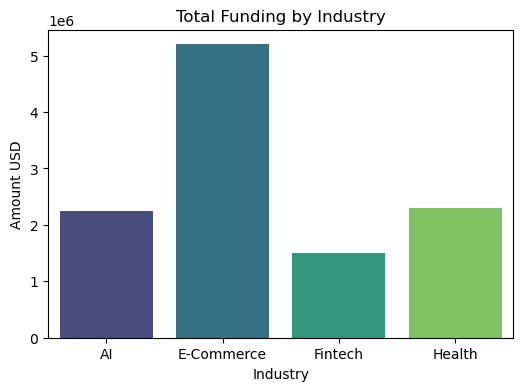

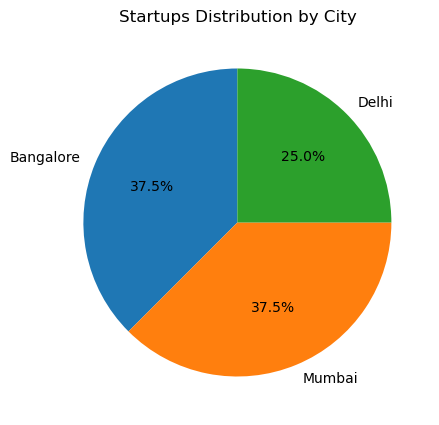

In [13]:
# Bar plot: Total funding by Industry
plt.figure(figsize=(6,4))
sns.barplot(x=industry_totals.index, y=industry_totals.values, palette='viridis')
plt.title('Total Funding by Industry')
plt.ylabel('Amount USD')
plt.show()

# Pie chart: Startups distribution by City
plt.figure(figsize=(5,5))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Startups Distribution by City')
plt.show()


In [14]:
#  Top 3 funded startups
top_startups = investments.sort_values('Amount_USD', ascending=False).head(3)
print(top_startups[['Startup', 'Amount_USD', 'Industry', 'City']])


  Startup  Amount_USD    Industry       City
3   Delta     5000000  E-Commerce  Bangalore
1    Beta     2000000      Health     Mumbai
5    Zeta     1500000          AI      Delhi


In [15]:

# Highlight big investments (>1M USD)
big_investments = investments[investments['Big_Investment']]
print(big_investments[['Startup', 'Amount_USD', 'Industry', 'Funding_Round']])


  Startup  Amount_USD    Industry Funding_Round
1    Beta     2000000      Health      Series A
3   Delta     5000000  E-Commerce      Series B
5    Zeta     1500000          AI      Series A


/tmp/ipykernel_21001/2542255641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=big_investments, x='Industry', y='Amount_USD', palette='magma')


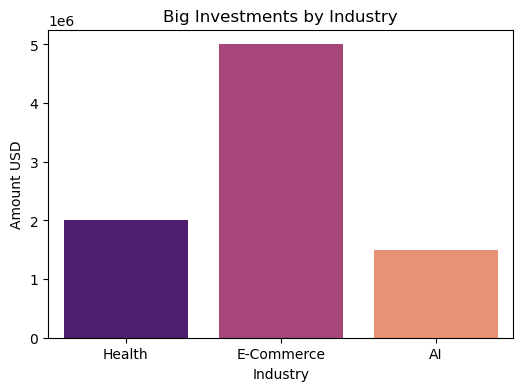

In [16]:
#Bar plot: Big investments by Industry
plt.figure(figsize=(6,4))
sns.barplot(data=big_investments, x='Industry', y='Amount_USD', palette='magma')
plt.title('Big Investments by Industry')
plt.ylabel('Amount USD')
plt.show()

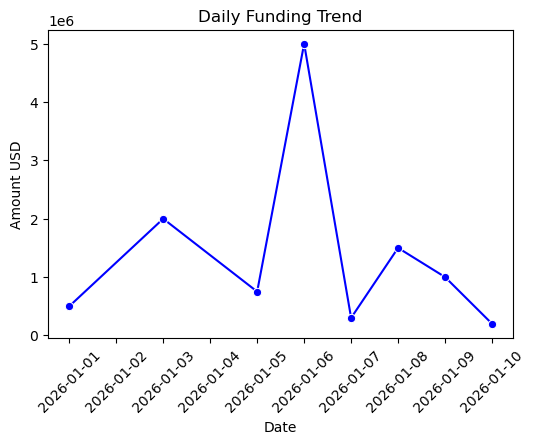

In [19]:
#  Create daily funding aggregation
daily_funding = investments.groupby('Date')['Amount_USD'].sum().reset_index()

# Now plot the funding trend
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.lineplot(data=daily_funding, x='Date', y='Amount_USD', marker='o', color='blue')
plt.title('Daily Funding Trend')
plt.ylabel('Amount USD')
plt.xticks(rotation=45)
plt.show()
